In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

import numpyro

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.models.rats.utils import load_data
from hb_mep.models.rats.mixture_model import MixtureModel
from hb_mep.utils import plot

numpyro.set_platform("cpu")
numpyro.set_host_device_count(12)
numpyro.enable_x64()

PARENT_PATH = Path(os.getcwd()).parent.parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

#### Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH


#### Load data and preprocess

In [4]:
data = DataClass(config)

a, b = 2, 3
subset = range(a, b)

df, mat, time = load_data(data, subset)
df, encoder_dict = data.build(df)


2023-05-25 09:15:47,158 - hb_mep.data_access.core - INFO - Processing data ...
2023-05-25 09:15:47,166 - hb_mep.utils.utils - INFO - func:preprocess took: 0.01 sec
2023-05-25 09:15:47,166 - hb_mep.utils.utils - INFO - func:build took: 0.01 sec


#### Plot data

In [6]:
# plot(df, encoder_dict=encoder_dict, mat=mat[:, :, 0], time=time);

#### Initialize model

In [7]:
model = MixtureModel(config)

#### Run MCMC inference

In [8]:
mcmc, posterior_samples = model.run_inference(df=df)

2023-05-25 09:16:11,710 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-05-25 09:16:11,711 - jax._src.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-05-25 09:16:11,711 - jax._src.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-05-25 09:16:11,712 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-05-25 09:16:11,712 - jax._src.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-05-25 09:16:11,811 - hb_mep.models.rats.rectified_logistic - INFO - Running inference with Rec

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

2023-05-25 09:22:41,233 - hb_mep.utils.utils - INFO - func:run_inference took: 6 min and 29.54 sec


#### Diagnostics

In [9]:
mcmc.print_summary()


                           mean       std    median      5.0%     95.0%     n_eff     r_hat
             a[0,0,0]    124.14      2.68    124.41    120.03    128.44   9437.70      1.00
             a[0,0,1]     45.53      1.37     45.72     43.35     47.60  10205.62      1.00
             a[0,0,2]     39.77      3.45     40.50     34.97     44.20   5043.43      1.00
             a[0,1,0]    128.70      2.00    128.87    125.92    131.88   9868.30      1.00
             a[0,1,1]    114.39      4.62    114.96    107.35    121.62  10139.16      1.00
             a[0,1,2]    110.56      3.42    110.72    104.82    114.99   6426.62      1.00
             a[0,2,0]    207.94      2.72    207.93    203.25    212.06  12773.38      1.00
             a[0,2,1]    227.34      1.98    227.85    224.33    230.06   5840.35      1.00
             a[0,2,2]    168.97      4.38    169.70    162.86    176.26   4942.68      1.00
             a[0,3,0]    207.10      3.20    207.25    201.71    212.13  11274.

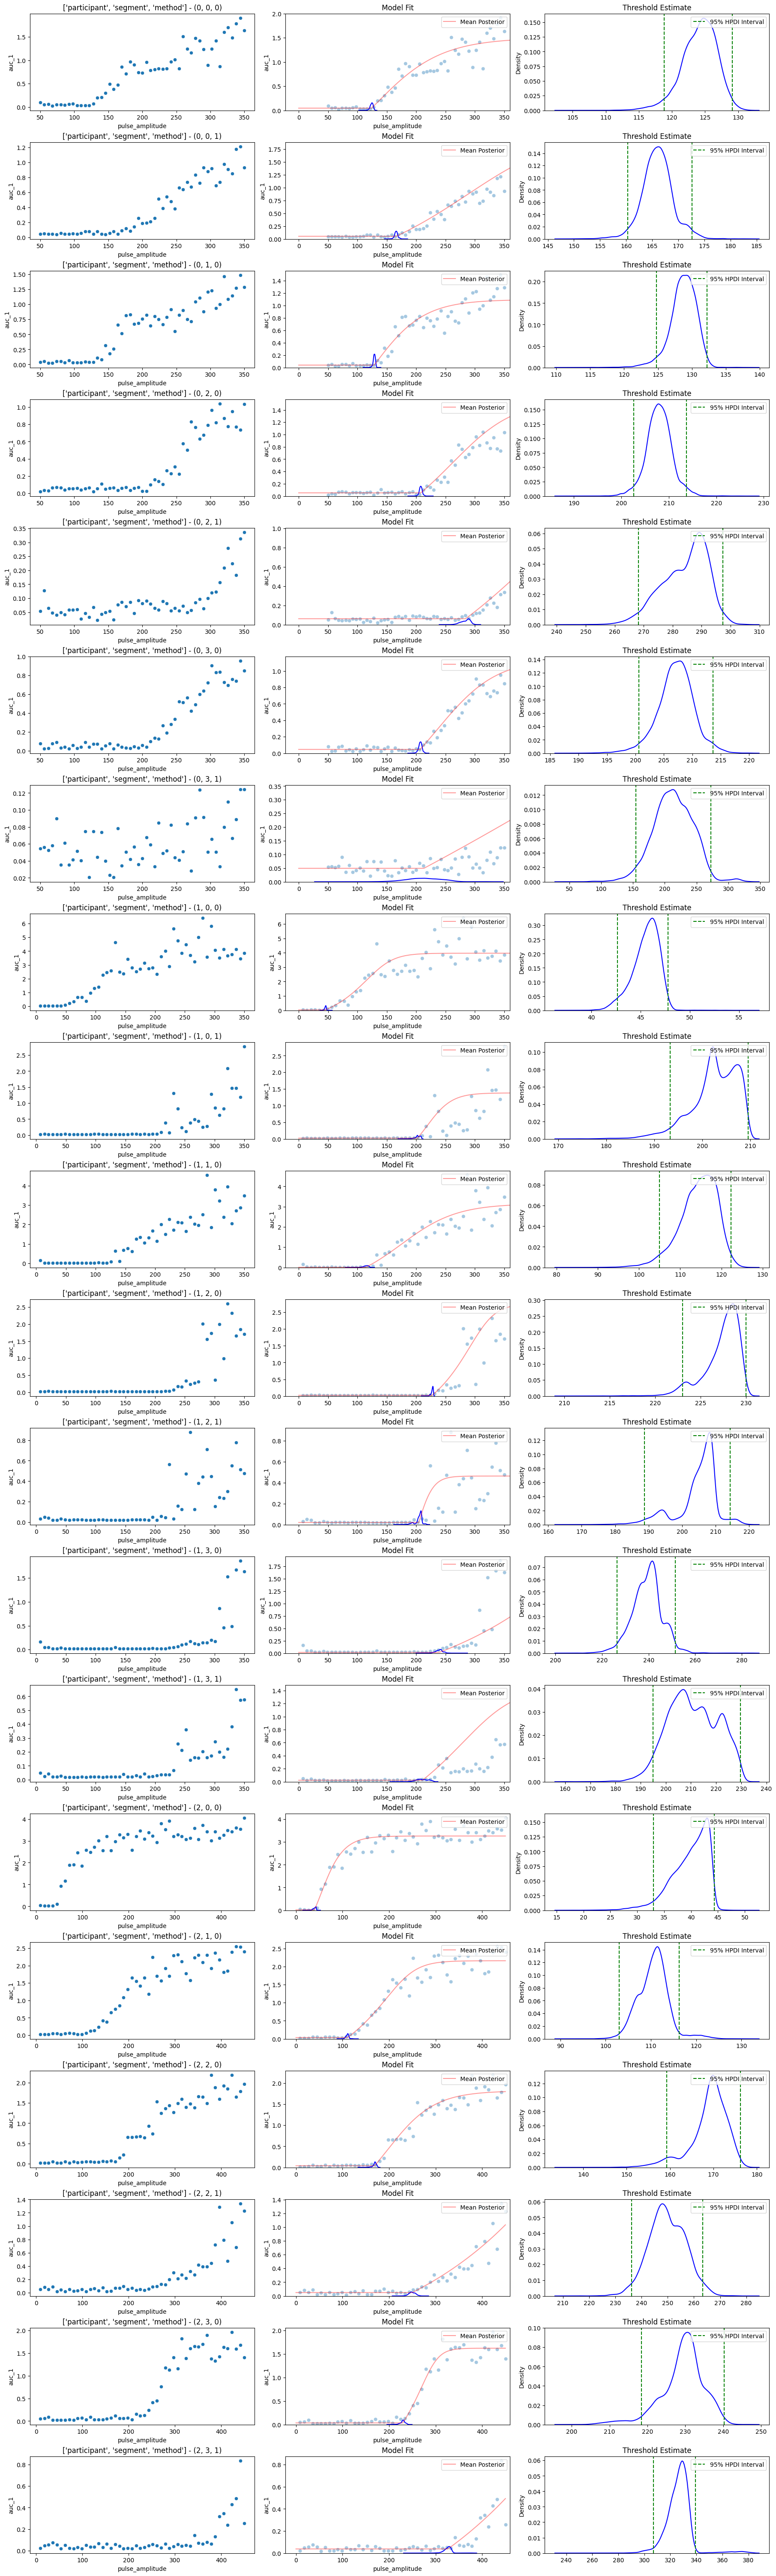

In [10]:
model.plot(df=df, posterior_samples=posterior_samples);